<a href="https://colab.research.google.com/github/asalunai/IoT-trabalho/blob/main/teste_ana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
import requests 

In [2]:
def baixa(est, datai, dataf):

  # baixa os dados e converte em JSON:
  url = 'https://apitempo.inmet.gov.br/estacao/' + datai + '/' + dataf + '/' + est
  r = requests.get(url)
  info = r.json()
  # print(info[0])

  # transforma os dados em JSON em Dataframe:
  df = pd.DataFrame(info)
  colunas = ['DT_MEDICAO', 'HR_MEDICAO','TEM_MAX','TEM_MIN']
  df = df[colunas]

  # formata data:
  df['HR_MEDICAO'] = df['HR_MEDICAO'].astype(str).str.zfill(4)
  df['HR_MEDICAO'] = df['HR_MEDICAO'].str[:2]
  df['DT_MEDICAO'] = df['DT_MEDICAO'] + ' ' + df['HR_MEDICAO'] + ':00'
  df.drop('HR_MEDICAO', axis=1, inplace=True)

  # Define a data da medição como index:
  df.set_index('DT_MEDICAO', inplace=True)
  df.index = pd.to_datetime(df.index)

  # calcula a temperatura média:
  df = df.apply(pd.to_numeric, errors='coerce')
  df['TEM_MED'] = (df['TEM_MAX'] + df['TEM_MIN']) / 2
  df.drop(['TEM_MAX', 'TEM_MIN'], axis=1, inplace=True)

  # calcula máximas e mínimas diárias:
  df_med = df.resample('D').count()
  df_med.columns = ['Contagem']
  df_med['TP_MAX'] = df['TEM_MED'].resample('D').max()
  df_med['TP_MIN'] = df['TEM_MED'].resample('D').min()

  # se um dia apresentar menos do que 75% dos dados esperados, 
  # então considere esse dia como sendo não-representativo 
  # para o cálculo das máximas e mínimas diárias:
  #df_med.iloc[2,0] = 3 #teste
  df_med.loc[(df_med.Contagem < 24*0.75), ['TP_MAX', 'TP_MIN']] = np.nan

  # Salva o arquivo em um CSV
  df_med.to_csv(est+'.csv', float_format='%.3f')

  return

In [3]:
# Formato da data: AAAA-MM-DD
datai = '2019-09-01'
dataf = '2020-09-30'
#est_cod = ['A621', 'A618', 'A606', 'A609', 'A607']
#nomes = ['Vila Militar', 'Teresópolis', 'Cabo Frio', 'Resende', 'Campos dos Goytacazes']

est_cod = ['A899','A801','A806','A873','A765','A652','A612','A802','A878','A834','A808','A867','A866','A868','A851','A712','A767','A619','A602','A667','A606','A608','A620','A615','A634']
nomes = ['Santa Vitória Do Palmar','Porto Alegre','Florianopolis','Morretes','Bertioga','Rio De Janeiro - Copacabana','Vitória','Rio Grande','Mostardas','Tramandai','Torres','Ararangua','Laguna - Farol De Santa Marta','Itajai','Itapoá','Iguape','São Sebastião','Paratí','Rio De Janeiro-Marambaia','Saquarema','Arraial Do Cabo','Macaé','Campos Dos Goytacazes - São Tomé','Alfredo Chaves','Vila Velha']

for est in est_cod:
  print(est)
  baixa(est, datai, dataf)


A899
A801
A806
A873
A765
A652
A612
A802
A878
A834
A808
A867
A866
A868
A851


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


A712
A767
A619
A602
A667
A606
A608
A620
A615
A634


A802 - Rio Grande
A878 - Mostardas 
A834 - Tramandai
A808 - Torres
A867 - Ararangua
A866 - Laguna - Farol De Santa Marta
A868 - Itajai
A851 - Itapoá
A712 - Iguape 
A767 - São Sebastião
A619 - Paratí
A602 - Rio De Janeiro-Marambaia
A667 - Saquarema
A606 - Arraial Do Cabo
A608 - Macaé 
A620 - Campos Dos Goytacazes - São Tomé 
A615 - Alfredo Chaves
A634 - Vila Velha




A899 24.0
A801 23.994949494949495
A806 23.98989898989899
A873 23.984848484848484
A802 24.0
A834 23.833333333333332
A867 23.977272727272727
A866 23.81313131313131
A868 23.997474747474747
A712 24.0
A619 23.984848484848484
A602 23.98989898989899
A606 23.853535353535353
A608 23.997474747474747
A620 23.997474747474747


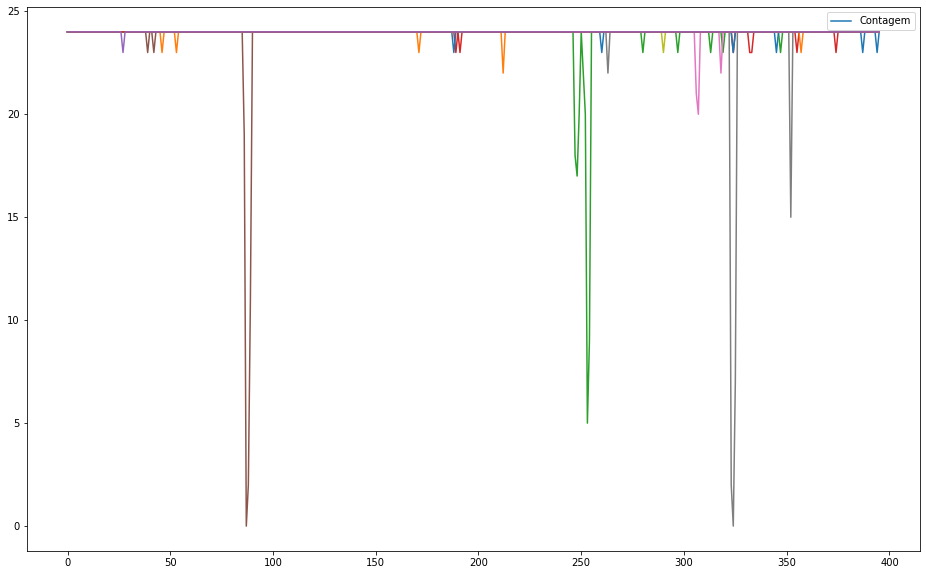

In [30]:
# plota a contagem dos dados

import matplotlib.pyplot as plt

est_cod2 = ['A899','A801','A806','A873','A802','A834','A867','A866','A868','A712','A619','A602','A606','A608','A620']
for est in est_cod2:
  df = pd.read_csv(est+'.csv')
  dfs = df['Contagem']
  print(est, dfs.mean())
  try:
    dfs.plot(ax=ax)
  except:
    ax = dfs.plot(figsize=[16,10],legend=True) 

plt.show()
plt.close("all")
del ax

In [32]:
dicio = {
  'A899' : 'Santa Vitória Do Palmar',
  'A801' : 'Porto Alegre',
  'A806' : 'Florianopolis',
  'A873' : 'Morretes',
  'A765' : 'Bertioga',
  'A652' : 'Rio De Janeiro-Copacabana',
  'A612' : 'Vitória',
  'A802' : 'Rio Grande',
  'A878' : 'Mostardas',
  'A834' : 'Tramandai',
  'A808' : 'Torres',
  'A867' : 'Ararangua',
  'A866' : 'Laguna - Farol De Santa Marta',
  'A868' : 'Itajai',
  'A851' : 'Itapoá',
  'A712' : 'Iguape',
  'A767' : 'São Sebastião',
  'A619' : 'Paratí',
  'A602' : 'Rio De Janeiro-Marambaia',
  'A667' : 'Saquarema',
  'A606' : 'Arraial Do Cabo',
  'A608' : 'Macaé',
  'A620' : 'Campos Dos Goytacazes - São Tomé',
  'A615' : 'Alfredo Chaves',
  'A634' : 'Vila Velha'
}

est_cod3 = ['A899','A806','A873','A834','A712','A619','A606','A620']
for est in est_cod3:
  print(dicio[est])

Santa Vitória Do Palmar
Florianopolis
Morretes
Tramandai
Iguape
Paratí
Arraial Do Cabo
Campos Dos Goytacazes - São Tomé
